In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def Qtransform(deg, Q):
    m = math.cos(math.radians(deg)) #m = cos(deg)
    n = math.sin(math.radians(deg)) #n = sin(deg)
    
    T = [[m**4, n**4, 2*m**2*n**2, 4*m**2*n**2],
        [n**4, m**4, 2*m**2*n**2, 4*m**2*n**2],
        [m**2*n**2, m**2*n**2, m**4+n**4, -4*m**2*n**2],
        [m**2*n**2, m**2*n**2, -2*m**2*n**2, (m**2-n**2)**2],
        [m**3*n, -m*n**3, m*n**3-m**3*n, 2*(m*n**3-m**3*n)],
        [m*n**3, -m**3*n, m**3*n-m*n**3, 2*(m**3*n-m*n**3)]] #transform matrix for Q to Q_bar
      
    T = np.array(T)
    return(T @ Q) #return Q_bar

In [3]:
def matrify(M):
    
    out = [[M[0], M[2], M[4]],
    [M[2], M[1], M[5]],
    [M[4], M[5], M[3]],]
    
    return np.array(out) #make output array into matrix

In [4]:
def dTQalphatransform(deg, s, Q):
    global Ti, Tf
    
    m = math.cos(math.radians(deg))
    n = math.sin(math.radians(deg))
    
    T = [[m**2, n**2, 2*m*n],
        [n**2, m**2, -2*m*n],
        [-m*n, m*n, m**2-n**2]]
    
    T = np.array(T)
    
    coef = T @ s #transformed coefficients
    coef[2] *= 2 # 1/2 adjust for shear
    
    dT = Tf - Ti
    
    out = dT * (Q @ coef)
    
    return(out) # return coefficients of thermal expansion

In [5]:
#properties

E1 = 167*10**3 #MPa
E2 = 8.43*10**3 #MPa
G12 = 4.93*10**3 #MPa
v12 = 0.27
X = 2550 #MPa
Xi = 1600 #MPa
Y = 71.5 #MPa
Yi = 188.5 #MPa
S = 65.5 #MPa
alpha1 = 0.136*10**-6  #degC^-1
alpha2 = 28.4*10**-6  #degC^-1
rho = 1.55*10**3 #kgm^-3

alpha = 22.5 #deg
theta = 45 #deg
phi = 67.5 #deg

Ti = 180 + 273 #K
Tf = 25 + 273 #K

In [6]:
v21 = v12*E2/E1
denom = 1 - (v12*v21)

#obtain Q matrix values from material properties
Q11 = E1 / denom #MPa
Q12 = Q21 = v12*E2 / denom #MPa
Q22 = E2 / denom #MPa
Q66 = G12 #MPa

In [7]:
thermals = [alpha1, alpha2, 0]
thermals = np.array(thermals)

In [8]:
Q = [Q11, Q22, Q12, Q66]
Q = np.array(Q)

#Q_bar matrices
Q_0 = matrify(Qtransform(0, Q))
Q_posalpha = matrify(Qtransform(alpha, Q))
Q_negalpha = matrify(Qtransform(-alpha, Q))
Q_postheta = matrify(Qtransform(theta, Q))
Q_negtheta = matrify(Qtransform(-theta, Q))
Q_posphi = matrify(Qtransform(phi, Q))
Q_negphi = matrify(Qtransform(-phi, Q))

print("Qij Matrix") #MPa
print(Q_0) #Q
print("\n")
print("Qij(+alpha) Matrix") #MPa
print(Q_posalpha) #Q_bar +alpha
print("\n")
print("Qij(-alpha) Matrix") #MPa
print(Q_negalpha) #Q_bar -alpha
print("\n")
print("Qij(+theta) Matrix") #MPa
print(Q_postheta) #Q_bar theta
print("\n")
print("Qij(-theta) Matrix") #MPa
print(Q_negtheta) #Q_bar -theta
print("\n")
print("Qij(+phi) Matrix") #MPa
print(Q_posphi) #Q_bar phi
print("\n")
print("Qij(-phi) Matrix") #MPa
print(Q_negphi) #Q_bar -phi
print("\n")


Qij Matrix
[[167616.81683795   2284.50680721      0.        ]
 [  2284.50680721   8461.13632302      0.        ]
 [     0.              0.           4930.        ]]


Qij(+alpha) Matrix
[[125335.3896154   21258.12425053  47108.63268243]
 [ 21258.12425053  12795.32865893   9161.3977958 ]
 [ 47108.63268243   9161.3977958   23903.61744332]]


Qij(-alpha) Matrix
[[125335.3896154   21258.12425053 -47108.63268243]
 [ 21258.12425053  12795.32865893  -9161.3977958 ]
 [-47108.63268243  -9161.3977958   23903.61744332]]


Qij(+theta) Matrix
[[50091.74169385 40231.74169385 39788.92012873]
 [40231.74169385 50091.74169385 39788.92012873]
 [39788.92012873 39788.92012873 42877.23488663]]


Qij(-theta) Matrix
[[ 50091.74169385  40231.74169385 -39788.92012873]
 [ 40231.74169385  50091.74169385 -39788.92012873]
 [-39788.92012873 -39788.92012873  42877.23488663]]


Qij(+phi) Matrix
[[ 12795.32865893  21258.12425053   9161.3977958 ]
 [ 21258.12425053 125335.3896154   47108.63268243]
 [  9161.3977958   4710

In [9]:
#coefficients of thermal expansion
dTQalpha_0 = dTQalphatransform(0, thermals, Q_0)
dTQalpha_posalpha = dTQalphatransform(alpha, thermals, Q_posalpha)
dTQalpha_negalpha = dTQalphatransform(-alpha, thermals, Q_negalpha)
dTQalpha_postheta = dTQalphatransform(theta, thermals, Q_postheta)
dTQalpha_negtheta = dTQalphatransform(-theta, thermals, Q_negtheta)
dTQalpha_posphi = dTQalphatransform(phi, thermals, Q_posphi)
dTQalpha_negphi = dTQalphatransform(-phi, thermals, Q_negphi)

In [10]:
lam_a = [alpha, theta, phi, -phi, -theta, -alpha]
lam_b = [alpha, -alpha, theta, -theta, phi, -phi]

In [11]:
lam_aQ = [Q_posalpha, Q_postheta, Q_posphi, Q_negphi, Q_negtheta, Q_negalpha]
lam_bQ = [Q_posalpha, Q_negalpha, Q_postheta, Q_negtheta, Q_posphi, Q_negphi]

In [12]:
lam_adTQalpha = [dTQalpha_posalpha, dTQalpha_postheta, dTQalpha_posphi, dTQalpha_negphi, dTQalpha_negtheta, dTQalpha_negalpha]
lam_bdTQalpha = [dTQalpha_posalpha, dTQalpha_negalpha, dTQalpha_postheta, dTQalpha_negtheta, dTQalpha_posphi, dTQalpha_negphi]

In [13]:
#a) laminate a

a = []

for n in range(1,9):
    layers = lam_a * n
    layersQ = lam_aQ * n
    layersdTQalpha = lam_adTQalpha * n
    midlayer = len(layers) / 2 #find midpoint of laminate
    maxdist = midlayer * 0.125 #mm; maximum distance between middle layer to top
    
    h_bot = [] #hk
    h_top = [] #h(k-1)
    
    A = np.zeros((3,3))
    B = np.zeros((3,3))
    D = np.zeros((3,3))
    N = np.zeros((3,))
    M = np.zeros((3,))
    
    for i in range(len(layers)):
        top_dist = -(maxdist - i*0.125) #distance from midlayer to top of current layer
        bot_dist = -(maxdist - (i+1)*0.125) #distance from midlayer to bottom of current layer
        
        h_bot.append(bot_dist)
        h_top.append(top_dist)
        
        #solve hk-h(k-1) components
        h_componentA = bot_dist - top_dist
        h_componentB = bot_dist**2 - top_dist**2
        h_componentD = bot_dist**3 - top_dist**3
        h_componentN = bot_dist - top_dist
        h_componentM = bot_dist**2 - top_dist**2
        
        #current layer contribution to overall matrix
        tempA = layersQ[i] * h_componentA
        tempB = layersQ[i] * h_componentB
        tempD = layersQ[i] * h_componentD
        tempN = layersdTQalpha[i] * h_componentN
        tempM = layersdTQalpha[i] * h_componentM
    
        A += tempA
        B += tempB
        D += tempD
        N += tempN
        M += tempM
        
    B /= 2
    D /= 3
    M /= 2
    
    print("n =", n)
    
    print("A matrix")
    print(A) #MPa mm
    print("\n")
    
    print("B matrix")
    print(B) #MPa mm^2
    print("\n")
    
    print("D matrix")
    print(D) #MPa mm^3
    print("\n")
    
    NMT = np.concatenate((N,M)) #thermal stress and moment
    ABBD = np.concatenate((np.concatenate((A,B), axis = 1), np.concatenate((B,D), axis = 1)), axis = 0) #stress-strain relations
    
    result = np.linalg.inv(ABBD) @ NMT #resultant strains and curvatures
    
    print("Resultant Mid-Plane Strains and Curvatures")
    print(result)
    print("\n")
    
    a.append(result)

n = 1
A matrix
[[4.70556150e+04 2.06869975e+04 9.09494702e-13]
 [2.06869975e+04 4.70556150e+04 0.00000000e+00]
 [9.09494702e-13 0.00000000e+00 2.26711174e+04]]


B matrix
[[ 0.00000000e+00 -1.13686838e-13 -5.68861440e+03]
 [-1.13686838e-13  5.68434189e-14 -3.31691222e+03]
 [-5.68861440e+03 -3.31691222e+03 -1.13686838e-13]]


D matrix
[[ 3.57397125e+03  9.20292548e+02  0.00000000e+00]
 [ 9.20292548e+02  9.36313576e+02 -1.89478063e-14]
 [ 0.00000000e+00 -1.89478063e-14  1.01329817e+03]]


Resultant Mid-Plane Strains and Curvatures
[-1.24728272e-03 -2.54473675e-03  5.10014978e-19  5.80940282e-19
  5.82110125e-19  1.44251117e-02]


n = 2
A matrix
[[9.41112300e+04 4.13739951e+04 9.09494702e-13]
 [4.13739951e+04 9.41112300e+04 0.00000000e+00]
 [9.09494702e-13 0.00000000e+00 4.53422349e+04]]


B matrix
[[ 0.00000000e+00  4.54747351e-13 -1.13772288e+04]
 [ 4.54747351e-13 -1.13686838e-12 -6.63382444e+03]
 [-1.13772288e+04 -6.63382444e+03 -1.36424205e-12]]


D matrix
[[ 2.03823342e+04  7.6588031

In [14]:
#b) laminate b

b = []

for n in range(1,9):
    layers = lam_b * n
    layersQ = lam_bQ * n
    layersdTQalpha = lam_bdTQalpha * n
    midlayer = len(layers) / 2 #find midpoint of laminate
    maxdist = midlayer * 0.125 #mm; maximum distance between middle layer to top
    
    h_bot = [] #hk
    h_top = [] #h(k-1)
    
    A = np.zeros((3,3))
    B = np.zeros((3,3))
    D = np.zeros((3,3))
    N = np.zeros((3,))
    M = np.zeros((3,))
    
    for i in range(len(layers)):
        top_dist = -(maxdist - i*0.125) #distance from midlayer to top of current layer
        bot_dist = -(maxdist - (i+1)*0.125) #distance from midlayer to bottom of current layer
        
        h_bot.append(bot_dist)
        h_top.append(top_dist)

        #solve hk-h(k-1) components   
        h_componentA = bot_dist - top_dist
        h_componentB = bot_dist**2 - top_dist**2
        h_componentD = bot_dist**3 - top_dist**3
        h_componentN = bot_dist - top_dist
        h_componentM = bot_dist**2 - top_dist**2
        
        #current layer contribution to overall matrix
        tempA = layersQ[i] * h_componentA
        tempB = layersQ[i] * h_componentB
        tempD = layersQ[i] * h_componentD
        tempN = layersdTQalpha[i] * h_componentN
        tempM = layersdTQalpha[i] * h_componentM
    
        A += tempA
        B += tempB
        D += tempD
        N += tempN
        M += tempM
        
    B /= 2
    D /= 3
    M /= 2
    
    print("n =", n)
    
    print("A matrix")
    print(A) #MPa mm
    print("\n")
    
    print("B matrix")
    print(B) #MPa mm^2
    print("\n")
    
    print("D matrix")
    print(D) #MPa mm^3
    print("\n")
    
    NMT = np.concatenate((N,M)) #thermal stress and moment
    ABBD = np.concatenate((np.concatenate((A,B), axis = 1), np.concatenate((B,D), axis = 1)), axis = 0) #stress-strain relations
    
    result = np.linalg.inv(ABBD) @ NMT #resultant strains and curvatures
    
    print("Resultant Mid-Plane Strains and Curvatures")
    print(result)
    print("\n")
    
    b.append(result)

n = 1
A matrix
[[47055.61499205 20686.99754873     0.        ]
 [20686.99754873 47055.61499205     0.        ]
 [    0.             0.         22671.11744332]]


B matrix
[[-7.03375381e+03  6.82121026e-13 -1.50092110e+03]
 [ 6.82121026e-13  7.03375381e+03 -1.50092110e+03]
 [-1.50092110e+03 -1.50092110e+03  6.82121026e-13]]


D matrix
[[2403.37380112  772.06116173  296.46277255]
 [ 772.06116173 2403.37380112 -296.46277255]
 [ 296.46277255 -296.46277255  865.06678179]]


Resultant Mid-Plane Strains and Curvatures
[-3.56873492e-03 -3.56873492e-03 -8.67361738e-19 -7.86238072e-03
  7.86238072e-03  4.62392043e-03]


n = 2
A matrix
[[94111.22998409 41373.99509746     0.        ]
 [41373.99509746 94111.22998409     0.        ]
 [    0.             0.         45342.23488663]]


B matrix
[[-1.40675076e+04  9.09494702e-13 -3.00184221e+03]
 [ 9.09494702e-13  1.40675076e+04 -3.00184221e+03]
 [-3.00184221e+03 -3.00184221e+03  1.36424205e-12]]


D matrix
[[18041.13931875  7362.34038404   592.9255451 

In [15]:
colnames = ['n', 'strain_x', 'strain_y', 'strain_xy', 'curv_x', 'curv_y', 'curv_xy']

In [16]:
a_df = pd.concat([pd.DataFrame({"n": [1, 2, 3, 4, 5, 6, 7, 8]}), pd.DataFrame(a)], axis = 1)
a_df.columns = colnames

a_df

,n,strain_x,strain_y,strain_xy,curv_x,curv_y,curv_xy
0,1,-0.001247,-0.002545,5.100150e-19,5.809403e-19,5.821101e-19,0.014425
1,2,-0.002713,-0.002828,1.768763e-19,4.127731e-19,-6.678741e-19,0.001271
2,3,-0.002799,-0.002844,7.692536e-20,-1.252301e-19,5.858198e-20,0.000504
3,4,-0.002824,-0.002849,-3.733327e-20,-2.535374e-19,-3.942114e-19,0.000273
4,5,-0.002836,-0.002851,6.538513e-20,-1.853207e-19,1.778805e-19,0.000172
5,6,-0.002842,-0.002852,9.844934e-20,7.065215e-20,2.054496e-19,0.000118
6,7,-0.002845,-0.002853,5.722887e-21,-7.985578e-20,-1.426612e-19,0.000087
7,8,-0.002847,-0.002853,5.111893e-20,3.037122e-19,-4.301351e-19,0.000066


In [17]:
b_df = pd.concat([pd.DataFrame({"n": [1, 2, 3, 4, 5, 6, 7, 8]}), pd.DataFrame(b)], axis = 1)
b_df.columns = colnames

b_df

,n,strain_x,strain_y,strain_xy,curv_x,curv_y,curv_xy
0,1,-0.003569,-0.003569,-8.673617e-19,-0.007862,0.007862,0.004624
1,2,-0.002991,-0.002991,-5.421011e-20,-0.001410,0.001410,0.000471
2,3,-0.002913,-0.002913,2.710505e-20,-0.000599,0.000599,0.000177
3,4,-0.002887,-0.002887,4.065758e-20,-0.000332,0.000332,0.000094
4,5,-0.002875,-0.002875,-3.896352e-20,-0.000211,0.000211,0.000059
5,6,-0.002869,-0.002869,-2.202286e-20,-0.000146,0.000146,0.000040
6,7,-0.002865,-0.002865,-1.270549e-20,-0.000107,0.000107,0.000029
7,8,-0.002863,-0.002863,6.776264e-21,-0.000082,0.000082,0.000022


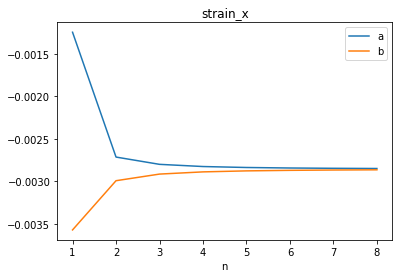

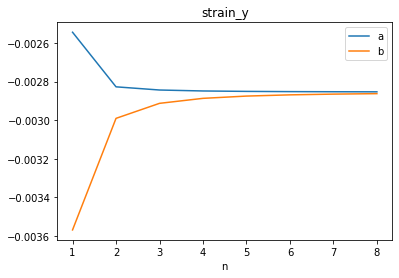

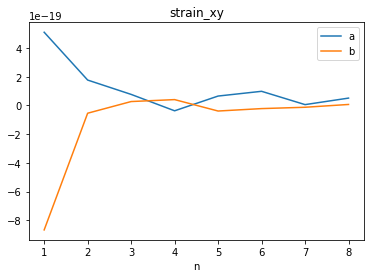

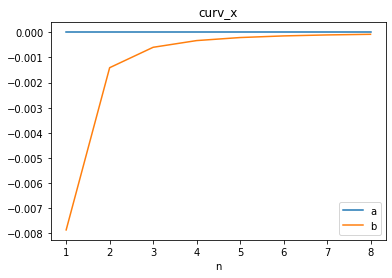

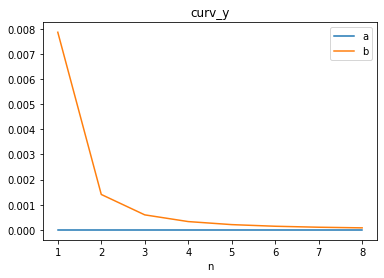

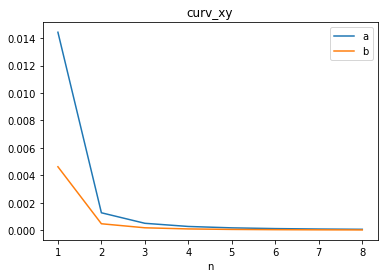

In [18]:
for var in range(1, a_df.shape[1]):
    plt.plot(a_df['n'], a_df.iloc[:, var], label = "a")
    plt.plot(b_df['n'], b_df.iloc[:, var], label = "b")
    plt.title(colnames[var])
    plt.legend()
    plt.xlabel("n")
    plt.show()

Based on the figures, it can be observed that increasing the number of layers decreases the amount of strains and curvature overall in the laminates. However, the most drastic difference is between n = 1 and n = 2, afterwards the effect of increasing layers is not as large. Furthermore, based on the ordering of layers, the amount of curvature in the x and y directions are similar, just in different axes. However, for curvature in the xy shear, laminate b performs better, whereas laminate a performs better in strain in the xy shear. Though, the xy shear strain is quite similar as the number of layers increase for both laminates. Finally, the strain in both the x and y directions eventually plateau to approximately -0.00286 for both laminates at higher numbers of layers.